<hr>
<h1><center> Regressão Linear Multipla </h1>
<hr>

    Neste Notebook, faço um exemplo de aplicação de Regressão Linear Multipla (RLM) como modelo preditor;
    Utilizei os dados de Preço de Casas, do Kaggle.
    
<h3> Passos Anteriores:</h3>
    
    1 - Preparação dos dados
        1.1 - Dados Faltantes
        1.2 - Outliers
    
<h3> Próximos passos</h3>

    2 - Modelo de Regressão Linear
        2.1 Treino
        2.2 Previsão

<hr>

    Começo importando todas as bibliotecas usadas ao longo do programa;

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

<hr>
Defino uma função para carregar os dados criados nos passos anteriores

In [2]:
def beam_me_up_Scotty(file):
    dataset = pd.read_csv(file)    
    print(dataset.shape)
    return dataset

<hr>
Vou começar pelo arquivo que teve os dados faltantes tratados, mas ainda contém Outliers. Em seguida repetimos a aplicação do modelo para os casos sem outliers. Faço isso para compararmos os resultados!

In [3]:
dataset=beam_me_up_Scotty('data/train_NoNAN.csv')
dataset.head()

(1412, 78)


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


<hr>
Abaixo, defino uma função com o modelo RLM em si. O processo se divide em:
    
    1) Seleciono apenas as variáveis numéricas e separo as variáveis independentes (X) da dependente (y);
    2) Divido o dados em :
        Conjunto de treino (X_train e y_train), na qual aplicaremos o modelo MRL;
        Conjunto de teste (X_test e y_test), com o qual testaremos o modelo;
    3) Defino o tipo de modelo adotado (LinearRegression);
    4) Aplico o modelo aos dados de treino para obter os coeficientes da regressão;
    5) Aplico os coeficientes obtinos ao grupo de teste, obtendo assim valores preditos pelo modelo (y_pred)

In [7]:
def MLR_model():
   #1) 
    x_num = [ cname for cname in dataset.columns if dataset[cname].dtype in ['int64','float64']]
    X=dataset[x_num].drop(['SalePrice'], axis=1)
    y = dataset['SalePrice']
   #2) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
   #3) 
    regressor = LinearRegression()
   #4) 
    regressor.fit(X_train, y_train)
    coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
    coeff_df
   #5) 
    y_pred = regressor.predict(X_test)
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Model Score: ',regressor.score(X_test,y_test))
    sns.regplot(x='Actual', y='Predicted',data=df)
    return df

<hr>
<h1>Vamos enfim ...</h1>  
             executar a função MLR_model() com o arquivo sem dados faltantes:

(1412, 78)
Mean Absolute Error: 22379.985777466212
Mean Squared Error: 1256205599.7476935
Root Mean Squared Error: 35442.99084089397
Model Score:  0.8045712521623131


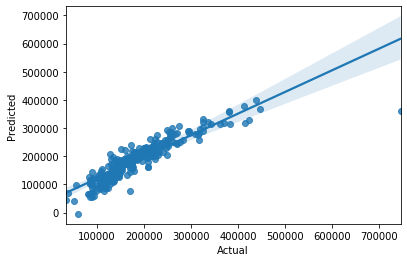

In [5]:
dataset=beam_me_up_Scotty('data/train_NoNAN.csv') # Importo os dados novamente para evitar confusão na hora de testar e retestar os cript
dataset.drop(['Unnamed: 0', 'Id'], axis = 1, inplace=True) # Removo itens não relevantes;
df=MLR_model()


<hr> 
<h1> Muito interessante! </h1>

Com pouquíssimas linhas de código, temos um modelo que prediz o preço de venda de uma casa, em algum lugar dos EUA, a partir de um conjunto de informações acerca do imóvel e da negociação. 
<hr>
<h1> Mas será que esse é um bom modelo? </h1>

Na preparação dos dados vimos que há diversos Outliers no conjunto de dados. O teste acima foi aplicado no conjunto de dados que contém todos aqueles outliers. Ademais, não foi verificado se há variáveis colineares nesse conjunto de dados.


Vamos abordar esses problemas! Para começar, vamos repetir o ajuste linear utilizando os dados sem outliers (removidos no programa Outliers.ipynb).

(552, 79)
Numericos:  37
Mean Absolute Error: 12839.589172151465
Mean Squared Error: 283723737.1726114
Root Mean Squared Error: 16844.100960651223
Model Score:  0.8946165304759386


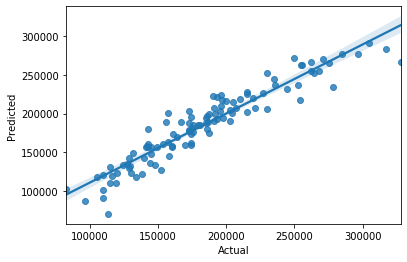

In [8]:
dataset=beam_me_up_Scotty('data/train_NoNAN_NoOutlier.csv')[3:]
dataset.drop(['Unnamed: 0', 'Id','Unnamed: 0.1'], axis = 1, inplace=True) # Removo itens não relevantes;
#print(dataset. columns)
df=MLR_model()


<hr> 
<h1> Melhorou! </h1>

Após removermos os outliers, nosso ajuste teve uma redução em todas as medidas de erro, e um aumento de Score para 0.89.
O erro absoluto médio caiu para cerca de 13 mil dólares.


<hr>
<h1> Mas .... </h1>

Embora tenhamos obtido um Score interessante, ainda não verificamos se há dados colineares comprometendo nossos resultados. E notem que até agora o trabalho ficou praticamente todo com os deselvolvedores da biblioteca scipy. O cientista de Dados fez praticamente nada até aqui!

Será que é possível continuar trabalhando nesses dados para obtermos resultados mais consistentes?

Vamos continuar a investigação em MLR_v1. 